Set up the PYTHONPATH so it can find the python modules we'll be using.

In [1]:
import sys, os
sys.path.append(os.path.join(os.path.pardir, 'python'))

In [2]:
from ufl import grad, div, nabla_grad, dx, inner, dot, Measure, FacetNormal, SpatialCoordinate, TestFunctions, TrialFunctions, div, exp, inner
from dolfinx.fem.petsc import LinearProblem 


Import the geometry module

In [3]:
import geometry as geo

Set the base resolution that will be used throughout

In [4]:
minres = 1.0

In [5]:
slab = geo.SlabSpline([0.0, 140.0, 240.0, 400.0], [0.0, -70.0, -120.0, -200.0], 
                       res=[1*minres, 1*minres, 1*minres, 6*minres], sid=1, name="Slab")
print(len(slab.points))

  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



4


In [6]:
# add partial coupling depths
slab.addpoint(80, "Slab::PartialCouplingDepth", res=1*minres)
slab.addpoint(82.5, "Slab::FullCouplingDepth", res=1*minres)
print(len(slab.points))

6


In [7]:
geo.SubductionGeometry?

Init signature: geo.SubductionGeometry(slab_spline, **kwargs)
Docstring:      <no docstring>
Init docstring:
Initialize the subduction geometry with the current values of:
* slab_spline:          SlabSpline object describing the slab
* coast_distance (>=0): distance from the trench that the coast is located,
                        does nothing if ==0.0 and the trench is at 0.0 depth
* extra_width (>=0):    extra width of domain beyond the final slab point,
                        does nothing if ==0.0
* slab_side_sid:        surface id of vertical side on slab side of domain
* wedge_side_sid:       surface id of vertical side on wedge side of domain
* slab_base_sid:        surface id of base of slab region of domain
* wedge_base_sid:       surface id of base of wedge region of domain,
                        only used if extra_width > 0.0
* coast_sid:            surface id of line between trench and coast,
                        only used if coast_distance > 0.0 or the slab trench is

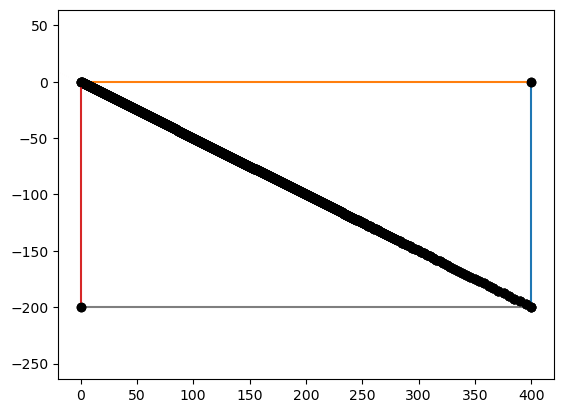

In [8]:
geom = geo.SubductionGeometry(slab, slab_rid=1, wedge_rid=2, 
                                    slab_side_sid=2, wedge_side_sid=3, slab_base_sid=7, 
                                    wedge_base_sid=8, coast_sid=11, top_sid=12,
                                    wedge_side_top_res=4*minres, slab_side_base_res=6*minres)
geom.plot()

In [9]:
geom.addcrustlayer?

Signature:
geom.addcrustlayer(
    depth,
    name,
    sid=None,
    rid=None,
    slab_res=None,
    side_res=None,
    slab_sid=None,
    side_sid=None,
)
Docstring: Add a crustal layer to the subduction geometry.
File:      ~/Documents/Fenicsx-subduction/python/geometry.py
Type:      method

  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



['WedgeSide', 'LowerCrust']
7


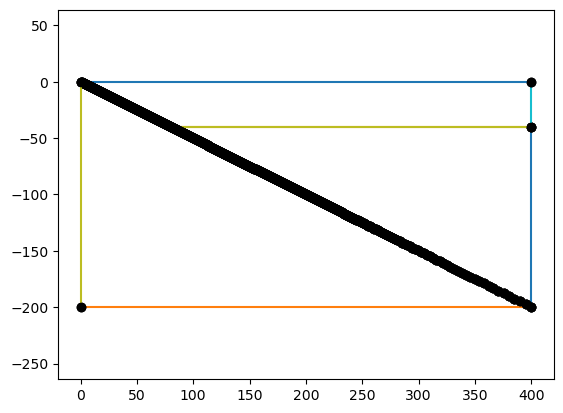

In [10]:
geom.addcrustlayer(40, "LowerCrust", sid=9, rid=3, slab_res=1*minres, side_res=2*minres, slab_sid=13, side_sid=5)
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])
print(len(slab.points))
geom.plot()


In [11]:
geom.writegeofile('benchmark1layer.geo_unrolled')

Info    : Writing 'benchmark1layer.geo_unrolled'...
Info    : Done writing 'benchmark1layer.geo_unrolled'


['WedgeSide', 'LowerCrust', 'UpperCrust']


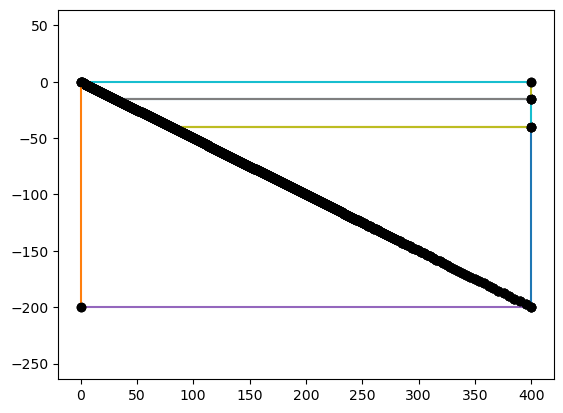

In [12]:
geom.addcrustlayer(15,"UpperCrust", sid=10, rid=4, slab_res= 1*minres, side_res=2*minres, side_sid=6)
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])
geom.plot()


['WedgeSide', 'UpperWedgeSide', 'LowerCrust', 'UpperCrust']


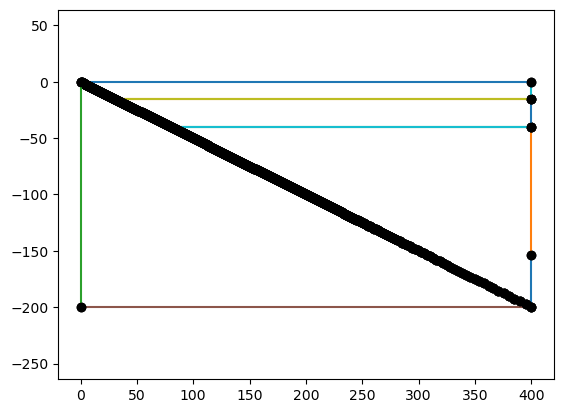

In [13]:
geom.addwedgesidepoint(154, "WedgeSide::InOut", line_name="UpperWedgeSide", res=2*minres, sid=4)
geom.plot()
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])


['WedgeSide', 'UpperWedgeSide', 'LowerCrust', 'UpperCrust']


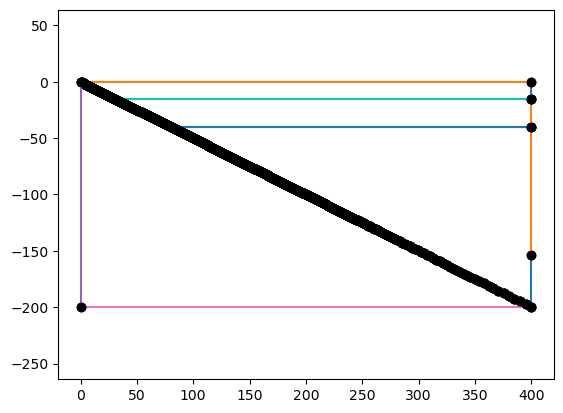

In [14]:
geom.addslabpoint(100, "Slab::DetectorPoint", res=1*minres)
geom.plot()
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])


In [15]:
mesh, ct, ft = geom.generatemesh()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 10%] Meshing curve 12 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : [ 10%] Meshing curve 15 (Line)
Info    : [ 10%] Meshing curve 16 (Line)
Info    : [ 10%] Meshing curve 17 (Line)
Info    : [ 10%] Meshing curve 18 (Line)
Info    : [ 10%] Meshing curve 19 (Line)
Info    : [ 10%] Meshing curve 20 (Line)
Info    : [ 10%] Meshing curve 21 (Line)
Info    : [ 10%] Meshing curve 22 (Line)
Info    : [ 10%] Meshing curve 23 (Line)
Info    : [ 10%] Meshing curve 24 (Line)
I


No module named 'trame'

Falling back to a static output.
  warnings.warn(



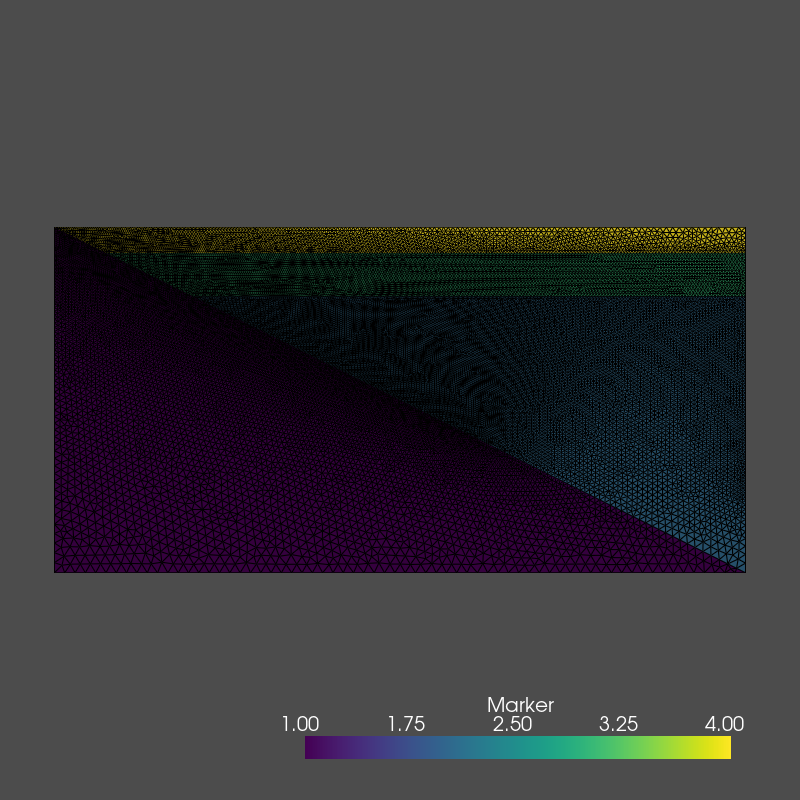

In [16]:
import pyvista
pyvista.start_xvfb()
from dolfinx.plot import create_vtk_mesh
topology, cell_types, x = create_vtk_mesh(mesh, mesh.topology.dim)
grid = pyvista.UnstructuredGrid(topology, cell_types, x)
num_local_cells = mesh.topology.index_map(mesh.topology.dim).size_local
grid.cell_data["Marker"] = ct.values[ct.indices<num_local_cells]
grid.set_active_scalars("Marker")

p = pyvista.Plotter(window_size=[800, 800])
p.add_mesh(grid, show_edges=True)
p.view_xy()
p.show()

In [17]:
import dolfinx
import numpy as np
import ufl
from dolfinx.fem import Function, FunctionSpace, dirichletbc, locate_dofs_geometrical, locate_dofs_topological, form

Ps2 = ufl.VectorElement("Lagrange", mesh.ufl_cell(), 2)
Ps1 = ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 2)
Ve = FunctionSpace(mesh, Ps2)
Pe = FunctionSpace(mesh, Ps1)
THs = Ps2 * Ps1
Vs = FunctionSpace(mesh, THs)

(v_as, p_as) = ufl.TrialFunctions(Vs)
(v_ts, p_ts) = ufl.TestFunctions(Vs)

Vs0, _ = Vs.sub(0).collapse()
Vs00, _ = Vs0.sub(0).collapse()
Vs01, _ = Vs0.sub(1).collapse()
Vs1, _ = Vs.sub(1).collapse()

Pw2 = ufl.VectorElement("Lagrange", mesh.ufl_cell(), 2)
Pw1 = ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 2)
Vwe = FunctionSpace(mesh, Pw2)
Pwe = FunctionSpace(mesh, Pw1)
THw = Pw2 * Pw1
Vw = FunctionSpace(mesh, THw)

(v_aw, p_aw) = ufl.TrialFunctions(Vw)
(v_tw, p_tw) = ufl.TestFunctions(Vw)

Vw0, _ = Vw.sub(0).collapse()
Vw00, _ = Vw0.sub(0).collapse()
Vw01, _ = Vw0.sub(1).collapse()
Vw1, _ = Vw.sub(1).collapse()


Vt = FunctionSpace(mesh, (ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 2)))
T_a = ufl.TrialFunction(Vt)
T_t = ufl.TestFunction(Vt)



In [18]:
slab_surface_dofs_Vs0 = dolfinx.fem.locate_dofs_topological((Vs.sub(0), Vs0), 1, np.concatenate((ft.find(1), ft.find(13))))


In [19]:
slab_surface_dofs_Vs1 = dolfinx.fem.locate_dofs_topological((Vs.sub(1), Vs1), 1, np.concatenate((ft.find(1), ft.find(13))))


In [20]:
All_except_slab_dofs_Vs0 = dolfinx.fem.locate_dofs_topological((Vs.sub(0), Vs0), 2, np.concatenate((ct.find(2), ct.find(3), ct.find(4))))

In [21]:
NonSlab_dofs_Vs0_indices = [i for i, dof in enumerate(All_except_slab_dofs_Vs0[0]) if dof not in slab_surface_dofs_Vs0[0]]
NonSlab_dofs_Vs0 = [All_except_slab_dofs_Vs0[i][NonSlab_dofs_Vs0_indices] for i in range(len(All_except_slab_dofs_Vs0))]

In [22]:
All_except_slab_dofs_Vs1 = dolfinx.fem.locate_dofs_topological((Vs.sub(1), Vs1), 2, np.concatenate((ct.find(2), ct.find(3), ct.find(4))))

In [23]:
NonSlab_dofs_Vs1_indices = [i for i, dof in enumerate(All_except_slab_dofs_Vs1[0]) if dof not in slab_surface_dofs_Vs1[0]]
NonSlab_dofs_Vs1 = [All_except_slab_dofs_Vs1[i][NonSlab_dofs_Vs1_indices] for i in range(len(All_except_slab_dofs_Vs1))]

In [24]:
slab_surface_dofs_Vw0 = dolfinx.fem.locate_dofs_topological((Vw.sub(0), Vw0), 1, ft.find(1))

In [25]:
slab_surface_dofs_Vw1 = dolfinx.fem.locate_dofs_topological((Vw.sub(1), Vw1), 1, ft.find(1))

In [26]:
upperWedge_surface_dofs_Vw0 = dolfinx.fem.locate_dofs_topological((Vw.sub(0), Vw0), 1, ft.find(9))

In [27]:
upperWedge_surface_dofs_Vw1 = dolfinx.fem.locate_dofs_topological((Vw.sub(1), Vw1), 1, ft.find(9))

In [28]:
All_except_wedge_dofs_Vw0 = dolfinx.fem.locate_dofs_topological((Vw.sub(0), Vw0), 2, np.concatenate((ct.find(1), ct.find(3), ct.find(4))))

In [29]:
NonWedge_dofs_Vw0_indices = [i for i, dof in enumerate(All_except_wedge_dofs_Vw0[0]) if dof not in slab_surface_dofs_Vw0[0]]
NonWedge_dofs_Vw0 = [All_except_wedge_dofs_Vw0[i][NonWedge_dofs_Vw0_indices] for i in range(len(All_except_wedge_dofs_Vw0))]


In [30]:
All_except_wedge_dofs_Vw1 = dolfinx.fem.locate_dofs_topological((Vw.sub(1), Vw1), 2, np.concatenate((ct.find(1), ct.find(3), ct.find(4))))

In [31]:
NonWedge_dofs_Vw1_indices = [i for i, dof in enumerate(All_except_wedge_dofs_Vw1[0]) if dof not in slab_surface_dofs_Vw1[0]]
NonWedge_dofs_Vw1 = [All_except_wedge_dofs_Vw1[i][NonWedge_dofs_Vw1_indices] for i in range(len(All_except_wedge_dofs_Vw1))]


In [32]:
NonWedgeTop_dofs_Vw1_indices = [i for i, dof in enumerate(NonWedge_dofs_Vw1[0]) if dof not in upperWedge_surface_dofs_Vw1[0]]
NonWedgeTop_dofs_Vw1 = [NonWedge_dofs_Vw1[i][NonWedgeTop_dofs_Vw1_indices] for i in range(len(NonWedge_dofs_Vw1))]


In [33]:
Backarc_dofs_Vt = dolfinx.fem.locate_dofs_topological(Vt, 1, np.concatenate((ft.find(4), ft.find(5), ft.find(6))))

In [34]:
top_surface_dofs_Vt = dolfinx.fem.locate_dofs_topological(Vt, 1, ft.find(12))

In [35]:
Trench_dofs_Vt = dolfinx.fem.locate_dofs_topological(Vt, 1, ft.find(2))

In [36]:
from petsc4py.PETSc import ScalarType
import scipy
zd = 97
Ts = 0
TsK = 273
Tm = 1350
kc = 0.8064516
erf = scipy.special.erf
h0=1000
H1=0.419354
H2=0.087097
qs=20.96774
z1=15
z2=40
kc=0.8064516
km=1
q1 = qs-(H1*z1)
q2=q1-H2*(z2-z1)
eta0=dolfinx.fem.Constant(mesh, ScalarType(10**21))
A_disl=28968.6
invA_disl=dolfinx.fem.Constant(mesh, ScalarType(1/A_disl))
E_o=dolfinx.fem.Constant(mesh, ScalarType(540000))
n=3.5
etamax=dolfinx.fem.Constant(mesh, ScalarType(10**25))
R=dolfinx.fem.Constant(mesh, ScalarType(8.3145))
T0=dolfinx.fem.Constant(mesh, ScalarType(1.0))
v0=dolfinx.fem.Constant(mesh, ScalarType(.023716014/365.25/24/60/60))
e0=dolfinx.fem.Constant(mesh, ScalarType(v0/h0))
nexp = (n-1.)/n
invA_disl.value, v0.value, e0.value

(array(3.45201356e-05), array(7.51515134e-10), array(7.51515134e-13))

In [37]:
Ttop = Function(Vt)
Ttop.x.set(0.0)
bc_Ttop = dirichletbc(Ttop, top_surface_dofs_Vt)

In [38]:
def T_l(x):
    return Tm*erf(-x[1]/zd) 
Ttrench = Function(Vt)
Ttrench.interpolate(T_l)
bc_trench_Vt = dirichletbc(Ttrench, Trench_dofs_Vt)

In [39]:

def T_backarc(values):
    Tbackarc = np.empty(values.shape[1])
    for i in range(values.shape[1]):
        x = values[:,i]
        if  x[1] >= -z1:
            Tbackarc[i] = Ts-H1*(x[1]**2)/(2*kc) - (qs/kc)*x[1]
        elif x[1] >= -z2:
            T1 = (Ts-H1*(z1**2)/(2*kc) + (qs/kc)*z1)
            Tbackarc[i] = T1 - H2*((-x[1]-z1)**2)/(2*kc)+(-x[1]-z1)*q1/kc
        else:
            T2 = (Ts-H1*(z1**2)/(2*kc) + (qs/kc)*z1) - H2*((z2-z1)**2)/(2*kc)+(z2-z1)*q1/kc
            Tbackarc[i] = min(Tm, T2+(-x[1]-z2)*q2/km)
    
        # else:
        #     Tbackarc[i]=Tm

    return Tbackarc

TBackarc = Function(Vt)
TBackarc.interpolate(T_backarc)


bc_backarc_Vt = dirichletbc(TBackarc, Backarc_dofs_Vt)
T_backarc(np.asarray([[0.0],[0.0]]))


array([0.])


No module named 'trame'

Falling back to a static output.
  warnings.warn(



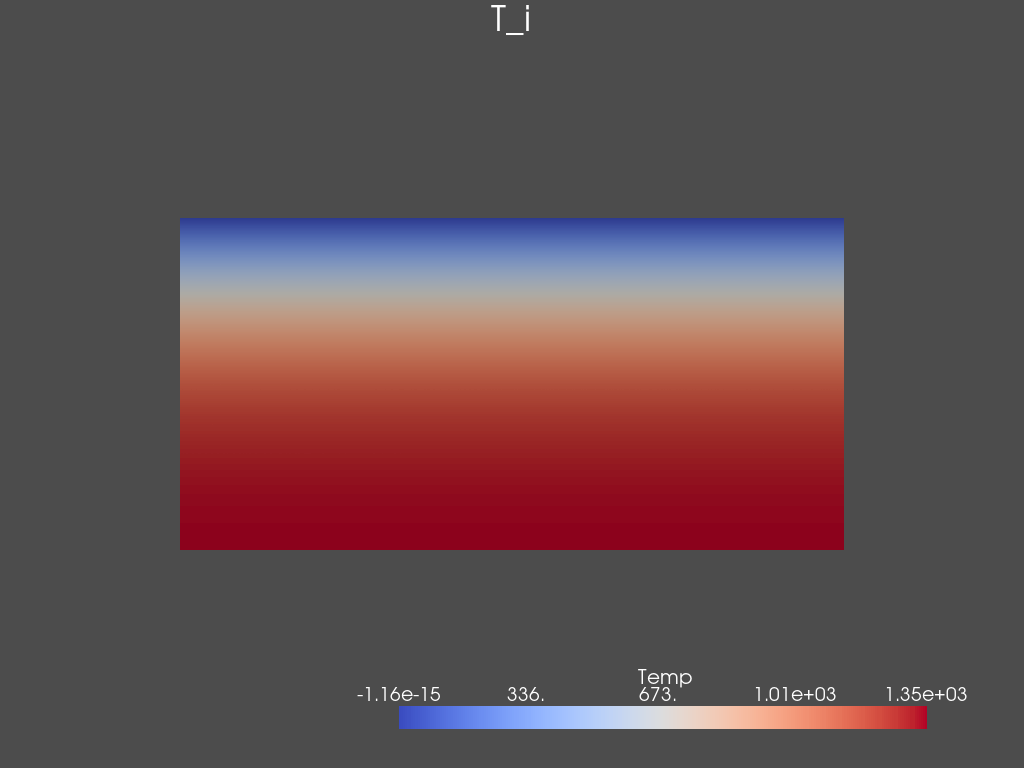

In [40]:
pyvista.start_xvfb()

from dolfinx.plot import create_vtk_mesh
pyvista_cells, cell_types, geometry = create_vtk_mesh(Ttrench.function_space)
grid = pyvista.UnstructuredGrid(pyvista_cells, cell_types, geometry)
grid.point_data["Temp"] = Ttrench.x.array
grid.set_active_scalars("Temp")

plotter = pyvista.Plotter()
plotter.add_text("T_i", position="upper_edge", font_size=14)
plotter.add_mesh(grid, show_edges=False, cmap = 'coolwarm')
plotter.view_xy()

if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    figure = plotter.screenshot("Temp.pdf")

In [41]:
zero_vs = Function(Vs0)
zero_vs.x.set(0.0)
bc_NonSlab_Vs0 = dirichletbc(zero_vs, NonSlab_dofs_Vs0, Vs.sub(0))


In [42]:
zero_ps = Function(Vs1)
zero_ps.x.set(0.0)
bc_NonSlab_Vs1 = dirichletbc(zero_ps, NonSlab_dofs_Vs1, Vs.sub(1))


In [43]:
zero_v = Function(Vw0)
zero_v.x.set(0.0)
bc_WedgeTop = dirichletbc(zero_v, upperWedge_surface_dofs_Vw0, Vw.sub(0))


In [44]:
zero_vw = Function(Vw0)
zero_vw.x.set(0.0)
bc_NonWedge_Vw0 = dirichletbc(zero_vw, NonWedge_dofs_Vw0, Vw.sub(0))


In [45]:
zero_pw = Function(Vw1)
zero_pw.x.set(0.0)
bc_NonWedgeTop_Vw1 = dirichletbc(zero_pw, NonWedgeTop_dofs_Vw1, Vw.sub(1))


In [46]:

vo = 0.023716

def slab_velocity_s(values):
    return_values = np.empty((2,values.shape[1]))
    for i in range(values.shape[1]):
        x = values[:,i]
        return_values[:,i] = 0.1*slab.unittangentx(x[0])/vo
    return return_values
Vslab_s = Function(Vs0)
Vslab_s.interpolate(slab_velocity_s)
bc_slab_s = dirichletbc(Vslab_s, slab_surface_dofs_Vs0, Vs.sub(0))


In [47]:

def slab_velocity_w(values):
    return_values = np.empty((2,values.shape[1]))
    cd = 80.0
    vo = 0.023716
    for i in range(values.shape[1]):
        x = values[:,i]
        return_values[:,i] = min(max(-(x[1]+cd)/2.5, 0.0), 1.0)*0.1*slab.unittangentx(x[0])/vo
    return return_values
Vslab_w = Function(Vw0)
Vslab_w.interpolate(slab_velocity_w)
bc_slab_w = dirichletbc(Vslab_w, slab_surface_dofs_Vw0, Vw.sub(0))


In [48]:
T_i=Function(Vt)
T_i.name = "Temperature"
T_i.interpolate(Ttrench, ct.find(1))
T_i.interpolate(TBackarc, np.concatenate((ct.find(2), ct.find(3), ct.find(4))))

In [49]:
ds = ufl.Measure('ds', domain=mesh, subdomain_data=ft)
dx = ufl.Measure("dx", domain=mesh, subdomain_data=ct)

In [50]:
from petsc4py.PETSc import ScalarType

zero_c = dolfinx.fem.Constant(mesh, ScalarType(0.0))
Ks0 = ufl.inner(ufl.sym(ufl.grad(v_ts)), 2*ufl.sym(ufl.grad(v_as)))*dx(1) + zero_c*ufl.inner(v_ts, v_as)*dx
Gs = -ufl.div(v_ts)*p_as*dx(1)
Ds = -p_ts*ufl.div(v_as)*dx(1)
Ss0 = Ks0 + Gs + Ds + zero_c*p_ts*p_as*dx

#Ss = ufl.inner(v_ts, v_as)*ufl.dx + p_ts*p_as*ufl.dx

fs = zero_c * v_ts[0] * dx(1)
problem_vs0 = dolfinx.fem.petsc.LinearProblem(Ss0, fs, bcs=[bc_slab_s, bc_NonSlab_Vs1, bc_NonSlab_Vs0], petsc_options={"ksp_type": "preonly", "pc_type": "lu", "pc_factor_mat_solver_type" : "mumps"})
us_i = problem_vs0.solve()
vs_i=us_i.sub(0)

In [51]:
zero_c = dolfinx.fem.Constant(mesh, ScalarType(0.0))
Kw0 = ufl.inner(ufl.sym(ufl.grad(v_tw)), 2*ufl.sym(ufl.grad(v_aw)))*dx(2) + zero_c*ufl.inner(v_tw, v_aw)*dx
Gw = -ufl.div(v_tw)*p_aw*dx(2)
Dw = -p_tw*ufl.div(v_aw)*dx(2)
Sw0 = Kw0 + Gw + Dw + zero_c*p_tw*p_aw*dx

#Sw = ufl.inner(v_tw, v_aw)*dx + p_tw*p_aw*dx


fw = zero_c * (v_tw[0] + v_tw[1] + p_tw) * dx(2)
problem_vw0 = dolfinx.fem.petsc.LinearProblem(Sw0, fw, bcs=[bc_slab_w, bc_WedgeTop, bc_NonWedge_Vw0, bc_NonWedgeTop_Vw1], petsc_options={"ksp_type": "preonly", "pc_type": "lu", "pc_factor_mat_solver_type" : "mumps"})
uw_i = problem_vw0.solve()
vw_i=uw_i.sub(0)

In [52]:
from ufl import sym, inner, dot
from ufl import sqrt
xs = SpatialCoordinate(mesh)
Tdim = TsK + T0*T_i - 0.3*xs[1] # dimensional temperature in Kelvin with an adiabat added
# wedge viscosity:
edot = sym(grad(vw_i))
eII = sqrt(0.5*inner(edot, edot))
# inverse dimensionless dislocation creep viscosity
inv_etadisl = eta0*invA_disl*exp(-E_o/(n*R*Tdim))*(e0**nexp)*(eII**nexp)
# inverse dimensionless effective viscosity
inv_etaprime = inv_etadisl + eta0/etamax
# "harmonic mean" viscosity (actually twice the harmonic mean)
etaprime = 1./inv_etaprime

# slab viscosity:
edots = sym(grad(vs_i))
eIIs = sqrt(0.5*inner(edots, edots))
# inverse dimensionless dislocation creep viscosity
inv_etadisls = eta0*invA_disl*exp(-E_o/(n*R*Tdim))*(e0**nexp)*(eIIs**nexp)
# inverse dimensionless effective viscosity
inv_etaprimes = inv_etadisls + eta0/etamax
# "harmonic mean" viscosity (actually twice the harmonic mean)
etaprimes = 1./inv_etaprimes

In [53]:
Veta = FunctionSpace(mesh, (ufl.FiniteElement("DG", mesh.ufl_cell(), 0)))
eta_a = ufl.TrialFunction(Veta)
eta_t = ufl.TestFunction(Veta)

Seta = eta_t*eta_a*dx
feta = eta_t*etaprimes*dx(1) + eta_t*etaprime*dx(2) + eta_t*1.e4*(dx(3)+dx(4))


problem_eta = dolfinx.fem.petsc.LinearProblem(Seta, feta, bcs=[], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
eta_i = problem_eta.solve()
eta_i.name = "Viscosity"

In [54]:
from dolfinx import io
eta_i = problem_eta.solve()
with io.VTKFile(mesh.comm, "output_v_benchmark.pvd", "w") as vtk:
    vtk.write_function([vw_i.collapse()], 0.0)
with io.VTKFile(mesh.comm, "output_T_benchmark.pvd", "w") as vtk:
    vtk.write_function([T_i], 0.0)
with io.VTKFile(mesh.comm, "output_eta_benchmark.pvd", "w") as vtk:
    vtk.write_function([eta_i], 0.0)

In [55]:
S1 =  (T_t*dot(vs_i, grad(T_a))+inner(grad(T_a), km*grad(T_t)))*dx(1)
S2 =  (T_t*dot(vw_i, grad(T_a))+inner(grad(T_a), km*grad(T_t)))*dx(2)
S3 =  (inner(grad(T_a), kc*grad(T_t)))*dx(3)
S4 =  (inner(grad(T_a), kc*grad(T_t)))*dx(4)
St=S1+S2+S3+S4
ft = T_t*H1*dx(4) + T_t*H2*dx(3)

problem_T = LinearProblem(St, ft, u=T_i, bcs=[bc_Ttop, bc_trench_Vt, bc_backarc_Vt], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
#T_i = problem_T.solve()

In [56]:
Ks = ufl.inner(ufl.sym(ufl.grad(v_ts)), 2*etaprimes*ufl.sym(ufl.grad(v_as)))*dx(1) + zero_c*ufl.inner(v_ts, v_as)*dx
Ss = Ks + Gs + Ds + zero_c*p_ts*p_as*dx
problem_vs = dolfinx.fem.petsc.LinearProblem(Ss, fs, u=us_i, bcs=[bc_slab_s, bc_NonSlab_Vs1, bc_NonSlab_Vs0], petsc_options={"ksp_type": "preonly", "pc_type": "lu", "pc_factor_mat_solver_type" : "mumps"})


In [57]:
Kw = ufl.inner(ufl.sym(ufl.grad(v_tw)), 2*etaprime*ufl.sym(ufl.grad(v_aw)))*dx(2) + zero_c*ufl.inner(v_tw, v_aw)*dx
Sw = Kw + Gw + Dw + zero_c*p_tw*p_aw*dx
fw = zero_c * (v_tw[0] + v_tw[1] + p_tw) * dx(2)
problem_vw = dolfinx.fem.petsc.LinearProblem(Sw, fw, u=uw_i, bcs=[bc_slab_w, bc_WedgeTop, bc_NonWedge_Vw0, bc_NonWedgeTop_Vw1], petsc_options={"ksp_type": "preonly", "pc_type": "lu", "pc_factor_mat_solver_type" : "mumps"})


In [58]:
from dolfinx import fem
rs = ufl.action(Ss, us_i)
rs_i = fem.assemble_vector(fem.form(rs))
fem.set_bc(rs_i.array, [bc_slab_s, bc_NonSlab_Vs1, bc_NonSlab_Vs0], scale=0.0)
rw = ufl.action(Sw, uw_i) 
rw_i = fem.assemble_vector(fem.form(rw))
fem.set_bc(rw_i.array, [bc_slab_w, bc_WedgeTop, bc_NonWedge_Vw0, bc_NonWedgeTop_Vw1], scale=0.0)

rT = ufl.action(St, T_i) - ft
rT_i = fem.assemble_vector(fem.form(rT))
fem.set_bc(rT_i.array, [bc_Ttop, bc_trench_Vt, bc_backarc_Vt], scale=0.0)

r = (rs_i.norm()**2 + rw_i.norm()**2 + rT_i.norm()**2)**0.5
r0 = r
r_rel = r/r0
r_tol = 1e-9
print(r_rel, r)



1.0 9021.427034117423


In [59]:
max_its = 50
it = 0
while r_rel > r_tol:
    if it >= max_its: break
    T_i = problem_T.solve()
    us_i = problem_vs.solve()
    uw_i = problem_vw.solve()
    rs_i = fem.assemble_vector(fem.form(rs))
    fem.set_bc(rs_i.array, [bc_slab_s, bc_NonSlab_Vs1, bc_NonSlab_Vs0], scale=0.0)
    rw_i = fem.assemble_vector(fem.form(rw))
    fem.set_bc(rw_i.array, [bc_slab_w, bc_WedgeTop, bc_NonWedge_Vw0, bc_NonWedgeTop_Vw1], scale=0.0)
    
    rT_i = fem.assemble_vector(fem.form(rT))
    fem.set_bc(rT_i.array, [bc_Ttop, bc_trench_Vt, bc_backarc_Vt], scale=0.0)
    r = (rs_i.norm()**2 +rw_i.norm()**2 + rT_i.norm()**2)**0.5
    r_rel = r/r0
    print(it, r_rel, r, r0)
    it += 1

0 0.09314437122002375 840.2951486001912 9021.427034117423
1 0.03203293244127556 288.98276270778035 9021.427034117423
2 0.01221632430397356 110.20867833341279 9021.427034117423
3 0.005615531829650068 50.660110658952 9021.427034117423
4 0.003075444489623326 27.744898060615334 9021.427034117423
5 0.001868245127383773 16.854237098538118 9021.427034117423
6 0.0012345002101278209 11.136953569270762 9021.427034117423
7 0.0008736923245531432 7.88195155622462 9021.427034117423
8 0.0006480025587836273 5.84590780198788 9021.427034117423
9 0.0004960537877867674 4.4751130515158914 9021.427034117423
10 0.00038810460729478614 3.50125739631471 9021.427034117423
11 0.0003084028376597196 2.7822336970619213 9021.427034117423
12 0.0002478776198078575 2.2362098604872864 9021.427034117423
13 0.00020093674256576078 1.8127361615302475 9021.427034117423
14 0.00016394341124632123 1.4790035222829927 9021.427034117423
15 0.00013442872570944896 1.2127389402771789 9021.427034117423
16 0.00011065566902818701 0.99827


No module named 'trame'

Falling back to a static output.
  warnings.warn(



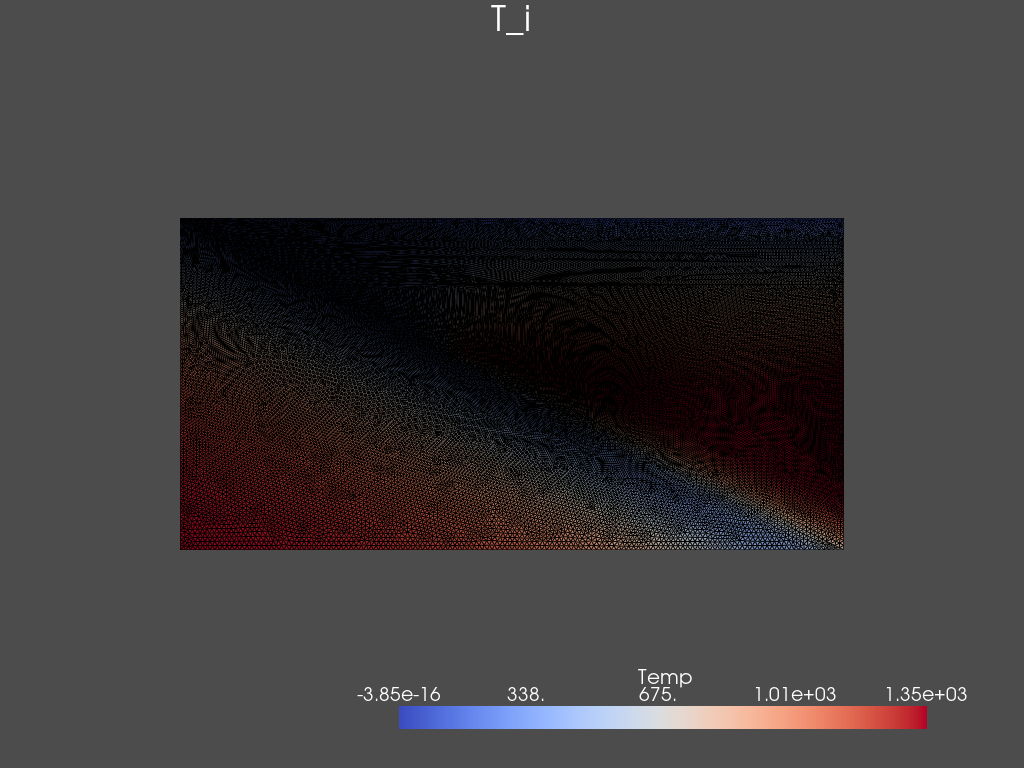

In [60]:
pyvista.start_xvfb()

from dolfinx.plot import create_vtk_mesh
pyvista_cells, cell_types, geometry = create_vtk_mesh(T_i.function_space)
grid = pyvista.UnstructuredGrid(pyvista_cells, cell_types, geometry)
grid.point_data["Temp"] = T_i.x.array
grid.set_active_scalars("Temp")

plotter = pyvista.Plotter()
plotter.add_text("T_i", position="upper_edge", font_size=14)
plotter.add_mesh(grid, show_edges=True, cmap = 'coolwarm')
plotter.view_xy()

if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    figure = plotter.screenshot("Temp.pdf")


No module named 'trame'

Falling back to a static output.
  warnings.warn(



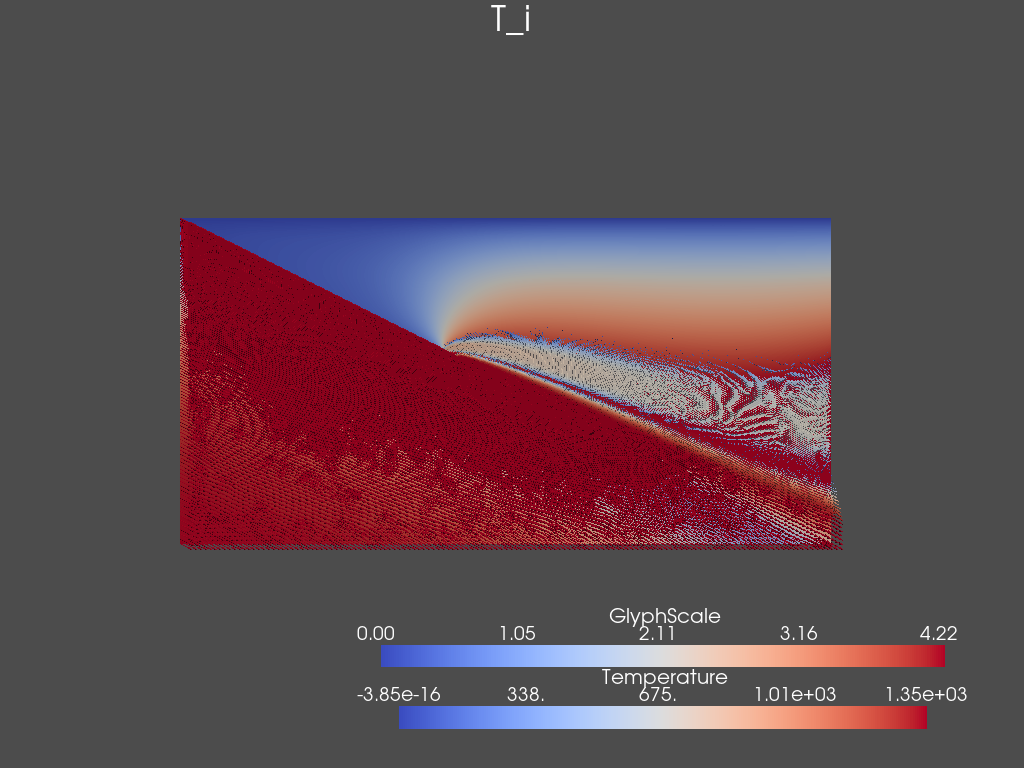

In [61]:
import pyvista
from dolfinx.plot import create_vtk_mesh

pyvista.start_xvfb()
topology_s, cell_types_s, geometry_s = create_vtk_mesh(Vs0)
values_s = np.zeros((geometry.shape[0], 3), dtype=np.float32)
values_s[:, :len(vs_i)] = vs_i.collapse().x.array.real.reshape((geometry.shape[0], len(vs_i)))

function_grid_s = pyvista.UnstructuredGrid(topology_s, cell_types_s, geometry_s)
function_grid_s["vs_i"] = values_s
glyphs_s = function_grid_s.glyph(orient="vs_i", factor=2.0)

pyvista.start_xvfb()
topology_w, cell_types_w, geometry_w = create_vtk_mesh(Vw0)
values_w = np.zeros((geometry.shape[0], 3), dtype=np.float32)
values_w[:, :len(vw_i)] = vw_i.collapse().x.array.real.reshape((geometry.shape[0], len(vw_i)))

function_grid_w = pyvista.UnstructuredGrid(topology_w, cell_types_w, geometry_w)
function_grid_w["vw_i"] = values_w
glyphs_w = function_grid_w.glyph(orient="vw_i", factor=2.0)

glyphs = glyphs_s+glyphs_w

pyvista_cells, cell_types, geometry = create_vtk_mesh(Vt)
grid = pyvista.UnstructuredGrid(pyvista_cells, cell_types, geometry)
grid.point_data["Temperature"] = T_i.x.array
grid.set_active_scalars("Temperature")
plotter = pyvista.Plotter()
plotter.add_text("T_i", position="upper_edge", font_size=14)
plotter.add_mesh(grid, show_edges=False, cmap = 'coolwarm')

plotter.add_mesh(glyphs, cmap='coolwarm')
plotter.view_xy()
if not pyvista.OFF_SCREEN:
     plotter.show()
else:
    glyphs = plotter.screenshot('glyphs.pdf', format='pdf')

In [62]:
from dolfinx import io
vw = uw_i.sub(0).collapse()
#v = Vslab_s
vw.name = "Velocity"
pw = uw_i.sub(1).collapse()
pw.name = "Pressure"



In [63]:
from dolfinx import io
eta_i = problem_eta.solve()
with io.VTKFile(mesh.comm, "output_v_benchmark_end.pvd", "w") as vtk:
    vtk.write_function([vw_i.collapse()], 1.0)
with io.VTKFile(mesh.comm, "output_T_benchmark_end.pvd", "w") as vtk:
    vtk.write_function([T_i], 1.0)
with io.VTKFile(mesh.comm, "output_eta_benchmark_end.pvd", "w") as vtk:
    vtk.write_function([eta_i], 1.0)


No module named 'trame'

Falling back to a static output.
  warnings.warn(



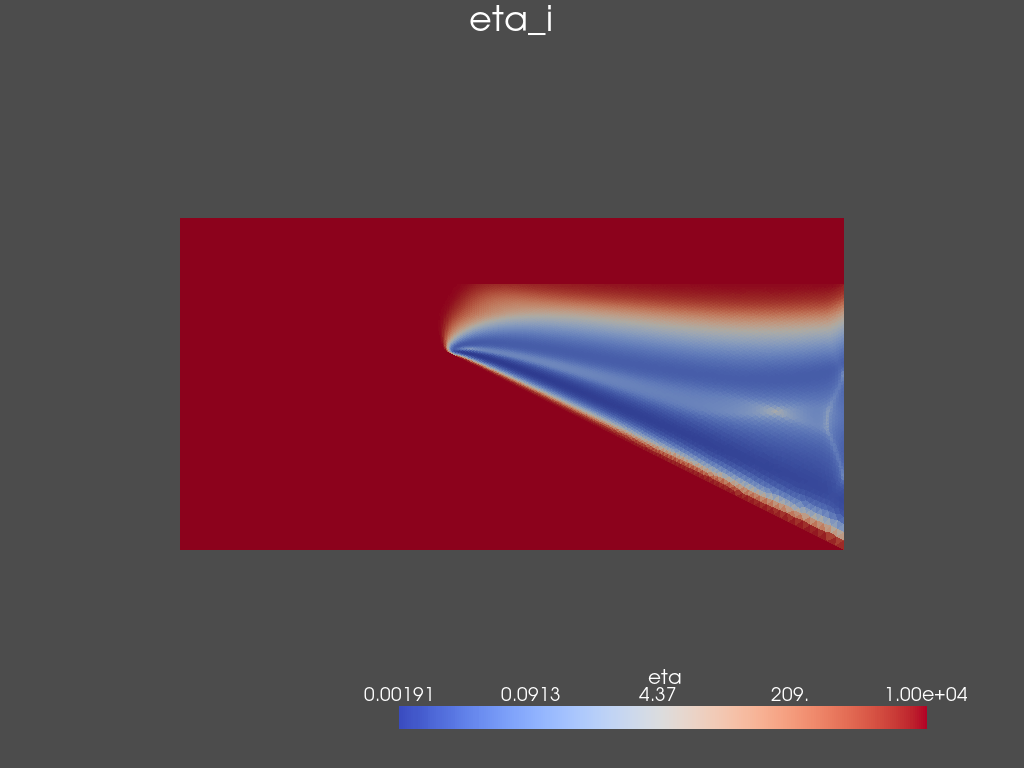

In [64]:
pyvista.start_xvfb()

from dolfinx.plot import create_vtk_mesh
# pyvista_cells, cell_types, geometry = create_vtk_mesh(eta_i.function_space)
# grid = pyvista.UnstructuredGrid(pyvista_cells, cell_types, geometry)
# grid.point_data["eta"] = eta_i.x.array
# grid.set_active_scalars("eta")

pyvista_cells, cell_types, geometry = create_vtk_mesh(mesh, mesh.topology.dim)
grid = pyvista.UnstructuredGrid(pyvista_cells, cell_types, geometry)
grid.cell_data["eta"] = eta_i.x.array
grid.set_active_scalars("eta")


plotter = pyvista.Plotter()
plotter.add_text("eta_i", position="upper_edge", font_size=14)
plotter.add_mesh(grid, show_edges=False, cmap = 'coolwarm', log_scale=True)
plotter.view_xy()

plotter.show()